In [9]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, TimeDistributed, Conv1D, MaxPooling1D

Using TensorFlow backend.


In [2]:
# Building synthetic chronological series of numbers dataset

data = np.arange(0,200)
data = np.array(data, dtype=float)

In [3]:
# Scaling down the raw data with StandardScaler()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1,1))

In [4]:
data_scaled = data_scaled.flatten()

In [5]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-10]

In [6]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-15:]

In [7]:
# Preparing the training dataset for LSTM input 

T = 5
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (185, 5, 1) Y.Shape: (185,)


In [8]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (148, 5, 1) x_test.shape: (37, 5, 1) y_train.shape: (148,) y_test.shape: (37,)


In [40]:
# Building Model CNN

model = Sequential()
model.add(Conv1D(filters=100, kernel_size=2, activation='relu', input_shape=(5,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(60, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [41]:
r = model.fit(x_train.reshape(148, 5, 1), y_train, epochs=1000, validation_data=(x_test.reshape(37, 5, 1), y_test))

Train on 148 samples, validate on 37 samples
Epoch 1/1000
148/148 [==============================] - 0s 2ms/step - loss: 0.5115 - val_loss: 0.6938
Epoch 2/1000
148/148 [==============================] - 0s 238us/step - loss: 0.2062 - val_loss: 0.2655
Epoch 3/1000
148/148 [==============================] - 0s 168us/step - loss: 0.0625 - val_loss: 0.0474
Epoch 4/1000
148/148 [==============================] - 0s 162us/step - loss: 0.0067 - val_loss: 2.1502e-04
Epoch 5/1000
148/148 [==============================] - 0s 141us/step - loss: 0.0054 - val_loss: 0.0135
Epoch 6/1000
148/148 [==============================] - 0s 155us/step - loss: 0.0060 - val_loss: 0.0088
Epoch 7/1000
148/148 [==============================] - 0s 137us/step - loss: 0.0042 - val_loss: 1.1078e-04
Epoch 8/1000
148/148 [==============================] - 0s 191us/step - loss: 0.0023 - val_loss: 0.0069
Epoch 9/1000
148/148 [==============================] - 0s 142us/step - loss: 0.0021 - val_loss: 0.0155
Epoch 10/1000

148/148 [==============================] - 0s 169us/step - loss: 1.6845e-07 - val_loss: 8.1372e-05
Epoch 75/1000
148/148 [==============================] - 0s 226us/step - loss: 1.6211e-07 - val_loss: 8.1216e-05
Epoch 76/1000
148/148 [==============================] - 0s 163us/step - loss: 1.6086e-07 - val_loss: 8.1259e-05
Epoch 77/1000
148/148 [==============================] - 0s 135us/step - loss: 1.5740e-07 - val_loss: 8.0418e-05
Epoch 78/1000
148/148 [==============================] - 0s 243us/step - loss: 1.5332e-07 - val_loss: 8.1204e-05
Epoch 79/1000
148/148 [==============================] - 0s 162us/step - loss: 1.5104e-07 - val_loss: 8.0028e-05
Epoch 80/1000
148/148 [==============================] - 0s 141us/step - loss: 1.4990e-07 - val_loss: 7.9757e-05
Epoch 81/1000
148/148 [==============================] - 0s 142us/step - loss: 1.5319e-07 - val_loss: 8.0084e-05
Epoch 82/1000
148/148 [==============================] - 0s 162us/step - loss: 1.4583e-07 - val_loss: 7.9191e-

148/148 [==============================] - 0s 141us/step - loss: 5.1857e-08 - val_loss: 7.2645e-05
Epoch 146/1000
148/148 [==============================] - 0s 182us/step - loss: 5.2626e-08 - val_loss: 7.0498e-05
Epoch 147/1000
148/148 [==============================] - 0s 142us/step - loss: 5.2144e-08 - val_loss: 7.2004e-05
Epoch 148/1000
148/148 [==============================] - 0s 148us/step - loss: 5.1797e-08 - val_loss: 7.1629e-05
Epoch 149/1000
148/148 [==============================] - 0s 148us/step - loss: 4.9614e-08 - val_loss: 7.1700e-05
Epoch 150/1000
148/148 [==============================] - 0s 135us/step - loss: 4.9173e-08 - val_loss: 7.2043e-05
Epoch 151/1000
148/148 [==============================] - 0s 135us/step - loss: 4.7098e-08 - val_loss: 7.1137e-05
Epoch 152/1000
148/148 [==============================] - 0s 142us/step - loss: 4.6636e-08 - val_loss: 7.1821e-05
Epoch 153/1000
148/148 [==============================] - 0s 142us/step - loss: 4.6868e-08 - val_loss: 

Epoch 217/1000
148/148 [==============================] - 0s 175us/step - loss: 2.4997e-08 - val_loss: 7.1006e-05
Epoch 218/1000
148/148 [==============================] - 0s 128us/step - loss: 2.3075e-08 - val_loss: 7.0150e-05
Epoch 219/1000
148/148 [==============================] - 0s 148us/step - loss: 2.3498e-08 - val_loss: 7.1259e-05
Epoch 220/1000
148/148 [==============================] - 0s 135us/step - loss: 2.3149e-08 - val_loss: 6.9988e-05
Epoch 221/1000
148/148 [==============================] - 0s 128us/step - loss: 2.2976e-08 - val_loss: 7.1253e-05
Epoch 222/1000
148/148 [==============================] - 0s 141us/step - loss: 2.4146e-08 - val_loss: 6.9490e-05
Epoch 223/1000
148/148 [==============================] - 0s 148us/step - loss: 2.4018e-08 - val_loss: 7.0899e-05
Epoch 224/1000
148/148 [==============================] - 0s 148us/step - loss: 2.4477e-08 - val_loss: 7.0341e-05
Epoch 225/1000
148/148 [==============================] - 0s 189us/step - loss: 2.3291e-

Epoch 289/1000
148/148 [==============================] - 0s 169us/step - loss: 4.1414e-08 - val_loss: 7.0110e-05
Epoch 290/1000
148/148 [==============================] - 0s 148us/step - loss: 2.4731e-08 - val_loss: 7.0185e-05
Epoch 291/1000
148/148 [==============================] - 0s 148us/step - loss: 3.2781e-08 - val_loss: 7.0752e-05
Epoch 292/1000
148/148 [==============================] - 0s 142us/step - loss: 2.0514e-08 - val_loss: 6.9511e-05
Epoch 293/1000
148/148 [==============================] - 0s 128us/step - loss: 1.5108e-08 - val_loss: 7.0625e-05
Epoch 294/1000
148/148 [==============================] - 0s 142us/step - loss: 1.5464e-08 - val_loss: 7.0311e-05
Epoch 295/1000
148/148 [==============================] - 0s 135us/step - loss: 1.3953e-08 - val_loss: 7.0369e-05
Epoch 296/1000
148/148 [==============================] - 0s 142us/step - loss: 1.4195e-08 - val_loss: 6.9336e-05
Epoch 297/1000
148/148 [==============================] - 0s 135us/step - loss: 1.3777e-

Epoch 361/1000
148/148 [==============================] - 0s 142us/step - loss: 1.3621e-08 - val_loss: 7.1701e-05
Epoch 362/1000
148/148 [==============================] - 0s 162us/step - loss: 1.1226e-08 - val_loss: 7.0765e-05
Epoch 363/1000
148/148 [==============================] - 0s 135us/step - loss: 1.3419e-08 - val_loss: 6.9320e-05
Epoch 364/1000
148/148 [==============================] - 0s 142us/step - loss: 1.6061e-08 - val_loss: 7.2502e-05
Epoch 365/1000
148/148 [==============================] - 0s 148us/step - loss: 2.1636e-08 - val_loss: 7.0513e-05
Epoch 366/1000
148/148 [==============================] - 0s 148us/step - loss: 1.8239e-08 - val_loss: 7.0172e-05
Epoch 367/1000
148/148 [==============================] - 0s 155us/step - loss: 1.2876e-08 - val_loss: 7.1238e-05
Epoch 368/1000
148/148 [==============================] - 0s 155us/step - loss: 1.2014e-08 - val_loss: 6.9897e-05
Epoch 369/1000
148/148 [==============================] - 0s 148us/step - loss: 1.1413e-

Epoch 433/1000
148/148 [==============================] - 0s 148us/step - loss: 3.3206e-08 - val_loss: 7.1668e-05
Epoch 434/1000
148/148 [==============================] - 0s 135us/step - loss: 5.8819e-08 - val_loss: 7.0981e-05
Epoch 435/1000
148/148 [==============================] - 0s 141us/step - loss: 1.1712e-07 - val_loss: 7.0406e-05
Epoch 436/1000
148/148 [==============================] - 0s 135us/step - loss: 7.7134e-08 - val_loss: 7.0340e-05
Epoch 437/1000
148/148 [==============================] - 0s 141us/step - loss: 6.6574e-08 - val_loss: 7.0554e-05
Epoch 438/1000
148/148 [==============================] - 0s 148us/step - loss: 7.2197e-08 - val_loss: 6.9988e-05
Epoch 439/1000
148/148 [==============================] - 0s 135us/step - loss: 2.7314e-08 - val_loss: 7.0044e-05
Epoch 440/1000
148/148 [==============================] - 0s 135us/step - loss: 2.8383e-08 - val_loss: 7.0722e-05
Epoch 441/1000
148/148 [==============================] - 0s 128us/step - loss: 2.5111e-

Epoch 505/1000
148/148 [==============================] - 0s 162us/step - loss: 3.4357e-06 - val_loss: 4.4143e-05
Epoch 506/1000
148/148 [==============================] - 0s 135us/step - loss: 3.1386e-06 - val_loss: 5.6851e-05
Epoch 507/1000
148/148 [==============================] - 0s 148us/step - loss: 4.7034e-06 - val_loss: 5.2676e-05
Epoch 508/1000
148/148 [==============================] - 0s 142us/step - loss: 1.8919e-06 - val_loss: 4.2761e-05
Epoch 509/1000
148/148 [==============================] - 0s 135us/step - loss: 1.4403e-06 - val_loss: 3.6915e-05
Epoch 510/1000
148/148 [==============================] - 0s 141us/step - loss: 2.2950e-06 - val_loss: 4.3262e-05
Epoch 511/1000
148/148 [==============================] - 0s 138us/step - loss: 3.0243e-06 - val_loss: 4.8585e-05
Epoch 512/1000
148/148 [==============================] - 0s 135us/step - loss: 8.9474e-07 - val_loss: 5.1866e-05
Epoch 513/1000
148/148 [==============================] - 0s 142us/step - loss: 6.9181e-

Epoch 577/1000
148/148 [==============================] - 0s 175us/step - loss: 2.9217e-05 - val_loss: 4.8700e-05
Epoch 578/1000
148/148 [==============================] - 0s 135us/step - loss: 2.3651e-05 - val_loss: 6.8698e-05
Epoch 579/1000
148/148 [==============================] - 0s 142us/step - loss: 2.2932e-05 - val_loss: 6.9035e-05
Epoch 580/1000
148/148 [==============================] - 0s 142us/step - loss: 2.1548e-05 - val_loss: 4.7844e-05
Epoch 581/1000
148/148 [==============================] - 0s 135us/step - loss: 1.3606e-05 - val_loss: 4.5474e-05
Epoch 582/1000
148/148 [==============================] - 0s 169us/step - loss: 9.8012e-06 - val_loss: 5.8898e-05
Epoch 583/1000
148/148 [==============================] - 0s 135us/step - loss: 4.0887e-06 - val_loss: 6.0918e-05
Epoch 584/1000
148/148 [==============================] - 0s 128us/step - loss: 1.6884e-06 - val_loss: 5.8961e-05
Epoch 585/1000
148/148 [==============================] - 0s 128us/step - loss: 6.6469e-

Epoch 649/1000
148/148 [==============================] - 0s 162us/step - loss: 1.4862e-08 - val_loss: 4.8729e-05
Epoch 650/1000
148/148 [==============================] - 0s 135us/step - loss: 1.5857e-08 - val_loss: 5.0280e-05
Epoch 651/1000
148/148 [==============================] - 0s 135us/step - loss: 1.2283e-08 - val_loss: 5.0371e-05
Epoch 652/1000
148/148 [==============================] - 0s 135us/step - loss: 1.2355e-08 - val_loss: 5.0784e-05
Epoch 653/1000
148/148 [==============================] - 0s 135us/step - loss: 1.0298e-08 - val_loss: 5.0792e-05
Epoch 654/1000
148/148 [==============================] - 0s 148us/step - loss: 1.0999e-08 - val_loss: 5.0007e-05
Epoch 655/1000
148/148 [==============================] - 0s 141us/step - loss: 1.1899e-08 - val_loss: 5.0135e-05
Epoch 656/1000
148/148 [==============================] - 0s 148us/step - loss: 1.8904e-08 - val_loss: 4.7518e-05
Epoch 657/1000
148/148 [==============================] - 0s 142us/step - loss: 3.2842e-

Epoch 721/1000
148/148 [==============================] - 0s 155us/step - loss: 8.0731e-05 - val_loss: 1.1836e-04
Epoch 722/1000
148/148 [==============================] - 0s 144us/step - loss: 8.7681e-05 - val_loss: 1.0143e-04
Epoch 723/1000
148/148 [==============================] - 0s 128us/step - loss: 4.4743e-04 - val_loss: 1.6427e-04
Epoch 724/1000
148/148 [==============================] - 0s 142us/step - loss: 3.3768e-04 - val_loss: 4.6450e-05
Epoch 725/1000
148/148 [==============================] - 0s 142us/step - loss: 6.7850e-05 - val_loss: 1.0404e-05
Epoch 726/1000
148/148 [==============================] - 0s 135us/step - loss: 1.1034e-04 - val_loss: 1.1714e-04
Epoch 727/1000
148/148 [==============================] - 0s 141us/step - loss: 6.0763e-05 - val_loss: 3.9024e-04
Epoch 728/1000
148/148 [==============================] - 0s 135us/step - loss: 5.5923e-05 - val_loss: 3.4856e-05
Epoch 729/1000
148/148 [==============================] - 0s 128us/step - loss: 1.3238e-

Epoch 793/1000
148/148 [==============================] - 0s 168us/step - loss: 2.4120e-08 - val_loss: 1.6432e-06
Epoch 794/1000
148/148 [==============================] - 0s 142us/step - loss: 2.2609e-08 - val_loss: 2.3707e-06
Epoch 795/1000
148/148 [==============================] - 0s 142us/step - loss: 2.5092e-08 - val_loss: 1.5564e-06
Epoch 796/1000
148/148 [==============================] - 0s 141us/step - loss: 2.7335e-08 - val_loss: 1.1551e-06
Epoch 797/1000
148/148 [==============================] - 0s 148us/step - loss: 3.5673e-08 - val_loss: 1.8773e-06
Epoch 798/1000
148/148 [==============================] - 0s 142us/step - loss: 2.9416e-08 - val_loss: 3.0175e-06
Epoch 799/1000
148/148 [==============================] - 0s 128us/step - loss: 2.6612e-08 - val_loss: 3.2062e-06
Epoch 800/1000
148/148 [==============================] - 0s 139us/step - loss: 3.5001e-08 - val_loss: 1.2655e-06
Epoch 801/1000
148/148 [==============================] - 0s 135us/step - loss: 3.4516e-

Epoch 865/1000
148/148 [==============================] - 0s 148us/step - loss: 1.3432e-08 - val_loss: 1.1331e-06
Epoch 866/1000
148/148 [==============================] - 0s 137us/step - loss: 1.2045e-08 - val_loss: 1.5116e-06
Epoch 867/1000
148/148 [==============================] - 0s 148us/step - loss: 1.0579e-08 - val_loss: 2.0403e-06
Epoch 868/1000
148/148 [==============================] - 0s 162us/step - loss: 1.3149e-08 - val_loss: 1.3737e-06
Epoch 869/1000
148/148 [==============================] - 0s 135us/step - loss: 1.1395e-08 - val_loss: 2.0904e-06
Epoch 870/1000
148/148 [==============================] - 0s 142us/step - loss: 1.0323e-08 - val_loss: 1.6857e-06
Epoch 871/1000
148/148 [==============================] - 0s 168us/step - loss: 9.6221e-09 - val_loss: 1.6885e-06
Epoch 872/1000
148/148 [==============================] - 0s 135us/step - loss: 1.2644e-08 - val_loss: 1.4868e-06
Epoch 873/1000
148/148 [==============================] - 0s 148us/step - loss: 1.5058e-

Epoch 937/1000
148/148 [==============================] - 0s 216us/step - loss: 2.1582e-06 - val_loss: 9.1767e-07
Epoch 938/1000
148/148 [==============================] - 0s 155us/step - loss: 1.9809e-06 - val_loss: 1.9854e-06
Epoch 939/1000
148/148 [==============================] - 0s 141us/step - loss: 3.6990e-06 - val_loss: 1.5727e-06
Epoch 940/1000
148/148 [==============================] - 0s 141us/step - loss: 1.6824e-06 - val_loss: 1.3931e-06
Epoch 941/1000
148/148 [==============================] - 0s 148us/step - loss: 4.1434e-07 - val_loss: 9.2375e-07
Epoch 942/1000
148/148 [==============================] - 0s 135us/step - loss: 9.4574e-08 - val_loss: 1.5660e-06
Epoch 943/1000
148/148 [==============================] - 0s 134us/step - loss: 1.0825e-07 - val_loss: 1.8648e-06
Epoch 944/1000
148/148 [==============================] - 0s 141us/step - loss: 5.9526e-08 - val_loss: 1.4129e-06
Epoch 945/1000
148/148 [==============================] - 0s 148us/step - loss: 3.7528e-

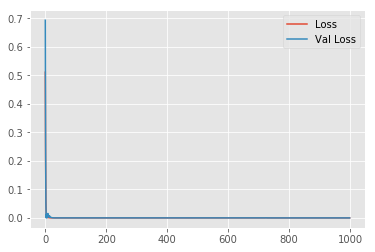

In [42]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()

In [43]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(37,5,1))

In [44]:
# reversing predicted y_test values 

scaler.inverse_transform(result).flatten()

array([153.00946, 154.01285, 155.01624, 156.0196 , 157.023  , 158.02637,
       159.02975, 160.03314, 161.03653, 162.0399 , 163.04329, 164.04666,
       165.05005, 166.05342, 167.05682, 168.06018, 169.06357, 170.06647,
       171.06932, 172.0729 , 173.07655, 174.08017, 175.08383, 176.08746,
       177.0911 , 178.09473, 179.09837, 180.10202, 181.10565, 182.10928,
       183.11345, 184.11801, 185.12213, 186.12592, 187.12973, 188.13351,
       189.13733], dtype=float32)

In [53]:
# adjusting predicited y_test values by rounding 

np.round(scaler.inverse_transform(result).flatten())

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.], dtype=float32)

In [52]:
# look into original y_test values

scaler.inverse_transform(y_test).flatten()

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.])

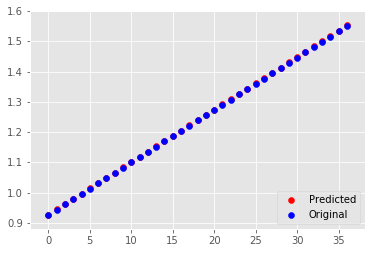

In [45]:
plt.style.use('ggplot')
plt.scatter(range(37), result, c='r', label="Predicted")
plt.scatter(range(37),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

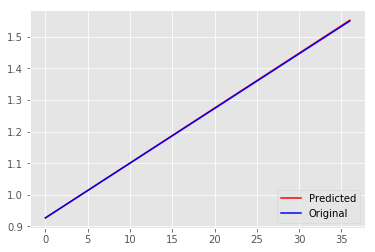

In [46]:
plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [48]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 5
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)


X_test.Shape: (10, 5, 1) Y_test.Shape: (10,)


In [49]:
# Testing the model with untrain dataset X_test 

result_01 = model.predict(X_test).flatten()

In [50]:
# adjusting predicited Y_test values by rounding  

np.round(scaler.inverse_transform(result_01).flatten())

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.],
      dtype=float32)

In [51]:
# look into original y_test values

scaler.inverse_transform(Y_test).flatten()

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.])